# Testing

---

### Download the CCN branch from GitHub and install the package

In [1]:
!git clone --single-branch --branch CNN https://github.com/simonandras/gym-snake
%cd gym-snake/
!pip install -e .

Cloning into 'gym-snake'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 740 (delta 207), reused 181 (delta 107), pack-reused 453
Receiving objects: 100% (740/740), 100.92 KiB | 4.80 MiB/s, done.
Resolving deltas: 100% (437/437), done.
/content/gym-snake
Obtaining file:///content/gym-snake
  Running setup.py develop for gym-snake


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import gym_snake
from gym_snake.algorithms.agent import Agent
from gym_snake.utilities.utils import increase_resolution 

### Using 4x4 map size with 3 long initial snake. The input image has 80x80 pixels (enlarged 20 times).

The environment can be created using gym.make function from OpenAI AI Gym

In [3]:
# env = gym.make('snake-v0', shape=(2, 2), initial_snake_length=2, enlargement=40)
env = gym.make('snake-v0', shape=(4, 4), initial_snake_length=3, enlargement=20)

### Create the agent

In [4]:
agent = Agent(env=env,
              memory_capacity=100_000,
              using_priority=False,
              min_exp_ratio=0.1,
              max_exp_ratio=1.,
              decay=0.001,
              gamma=0.99,
              batch_size=32,
              number_of_epochs=1,
              lr=0.00025)

### Check the used CNN structure

In [5]:
agent.brain.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 80, 80)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 20, 20)        2080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 10, 10)        32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 10, 10)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3277312   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                

### For first load the memory with experiences using a random agent (1000 episodes)

In [6]:
agent.play(number_of_episodes=1000, episode_max_length=1000, random=True, memorize=True, show_results=True)

0
Episode length: 2
Total reward: -1.0
1
Episode length: 2
Total reward: -1.0
2
Episode length: 4
Total reward: -1.02
3
Episode length: 2
Total reward: -1.0
4
Episode length: 3
Total reward: 0.0
5
Episode length: 3
Total reward: 0.0
6
Episode length: 6
Total reward: -1.04
7
Episode length: 6
Total reward: -1.04
8
Episode length: 2
Total reward: -1.0
9
Episode length: 7
Total reward: -0.040000000000000036
10
Episode length: 4
Total reward: -0.010000000000000009
11
Episode length: 2
Total reward: -1.0
12
Episode length: 3
Total reward: -1.01
13
Episode length: 5
Total reward: -1.03
14
Episode length: 2
Total reward: -1.0
15
Episode length: 10
Total reward: -1.08
16
Episode length: 19
Total reward: -1.17
17
Episode length: 4
Total reward: -1.02
18
Episode length: 5
Total reward: -1.03
19
Episode length: 2
Total reward: -1.0
20
Episode length: 2
Total reward: -1.0
21
Episode length: 3
Total reward: -1.01
22
Episode length: 2
Total reward: -1.0
23
Episode length: 3
Total reward: -1.01
24
Ep

### perform the training on 10_000 episodes 

Prioritized experience replay is disabled, beacause it is too slow in the current implementation

In [7]:
agent.learn(number_of_episodes=10_000,
            replay_size=32,
            synchronization_episode_number=500,
            priority_update_episode_number=500,  # not used
            saving_episode_number=100,
            verbose=0)

A streamkimeneten csak az utolsó 5000 sor látható.
Episode length: 2
Total reward: -1.0
8754
Exploration ratio at the end of the episode: 0.1
Episode length: 7
Total reward: 1.9800000000000004
8755
Exploration ratio at the end of the episode: 0.1
Episode length: 11
Total reward: 0.9299999999999999
8756
Exploration ratio at the end of the episode: 0.1
Episode length: 2
Total reward: -1.0
8757
Exploration ratio at the end of the episode: 0.1
Episode length: 31
Total reward: 4.770000000000001
8758
Exploration ratio at the end of the episode: 0.1
Episode length: 5
Total reward: -1.03
8759
Exploration ratio at the end of the episode: 0.1
Episode length: 2
Total reward: -1.0
8760
Exploration ratio at the end of the episode: 0.1
Episode length: 12
Total reward: -0.09000000000000008
8761
Exploration ratio at the end of the episode: 0.1
Episode length: 4
Total reward: -1.02
8762
Exploration ratio at the end of the episode: 0.1
Episode length: 14
Total reward: 1.910000000000001
8763
Exploration 

In [15]:
agent.play(number_of_episodes=100, episode_max_length=100, random=False, memorize=True, show_results=True)

0
Episode length: 21
Total reward: 3.8600000000000003
1
Episode length: 23
Total reward: 1.8200000000000012
2
Episode length: 30
Total reward: 4.780000000000002
3
Episode length: 2
Total reward: -1.0
4
Episode length: 13
Total reward: 0.9099999999999999
5
Episode length: 26
Total reward: 5.830000000000001
6
Episode length: 30
Total reward: 4.780000000000003
7
Episode length: 38
Total reward: 5.710000000000001
8
Episode length: 25
Total reward: 3.820000000000002
9
Episode length: 15
Total reward: 1.9000000000000004
10
Episode length: 2
Total reward: -1.0
11
Episode length: 21
Total reward: 0.8299999999999998
12
Episode length: 27
Total reward: 3.8000000000000016
13
Episode length: 32
Total reward: 5.770000000000002
14
Episode length: 8
Total reward: 1.9699999999999998
15
Episode length: 8
Total reward: 0.96
16
Episode length: 30
Total reward: 3.7700000000000022
17
Episode length: 19
Total reward: 0.8499999999999999
18
Episode length: 2
Total reward: -1.0
19
Episode length: 28
Total rewa

### Plot the performance in every episode

Rewards: <br>
The snake eat the apple: +1 <br>
The snake hits the wall or itself: -1 <br>
Otherwise: -0.01

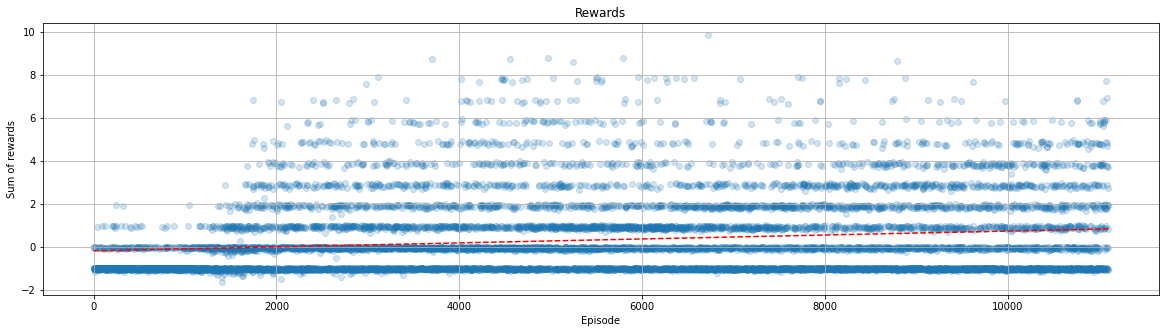

In [19]:
x = list(range(1, len(agent.reward_history) + 1))
y = agent.reward_history
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(20, 5))

plt.scatter(x, y, alpha=0.2)
plt.plot(x, p(x),"r--")

ax.grid(True, linestyle='-')

ax.set_title('Rewards')
ax.set_xlabel('Episode')
ax.set_ylabel('Sum of rewards')

plt.show()

The first 1000 episode was played with a random agent. Then for 10_000 episode an epsilon-greedy agen was used with decreasing epsilon. The minimal epsilon is 0.1. The last 100 episode was done with a completely greeady agent (0 epsilon).

The average reward at the end is above 2, wich means 3 score (-1 is added to the score at the end as reward, because of failing). It is below the human level, but it is able to play the game much better than the random agent.

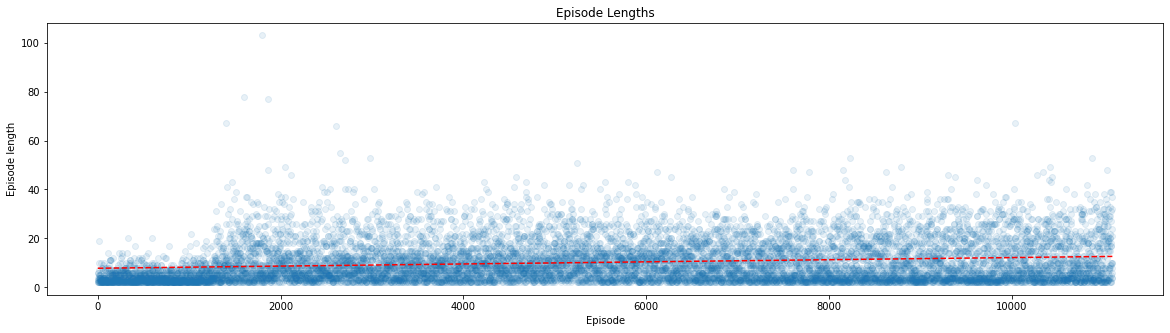

In [20]:
x = list(range(1, len(agent.length_history) + 1))
y = agent.length_history
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(20, 5))

plt.scatter(x, y, alpha=0.1)
plt.plot(x, p(x),"r--")

ax.set_title('Episode Lengths')
ax.set_xlabel('Episode')
ax.set_ylabel('Episode length')

plt.show()